## Exploratory Data Analysis:

1. After analysing and finding relationships with all the tables, we have cleaned, transformed, and loaded all the 3 tables in one dataset
2. vendor_sales_summary table. Now in this sheet we will analyze the data across all parameters, to gain insights from the same

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
import scipy.stats as stats
from scipy.stats import ttest_ind
import warnings
import math
warnings.filterwarnings('ignore')

In [47]:
# Creating database connection
conn = sqlite3.connect(r'E:\Vendor Performance Analysis\inventory.db')

cur = conn.cursor()

### After merging all three files into one dataset with 10,000 records, our next steps are:
1. Clean the data by identifying and removing unnecessary outliers
2. Analyse the dataset across multiple dimensions and categories
3. Perform in-depth exploration to understand patterns and insights under different scenarios

In [48]:
# Now fetch dataset named Vendor_sales_Summary from inventory.db

df = pd.read_sql_query("select * from vendor_sales_summary",conn)
df

,vendornumber,vendorname,brand,description,purchaseprice,ActualPrice,volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


In [71]:
df.describe().T

# Explanation: 
# Here we can find many 0 values, -inf, and NaN values, which are probably our outliers. So, in this, we will create subplots and see 
# what is it that is happening inside the data

,count,mean,std,min,25%,50%,75%,max
vendornumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
purchaseprice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


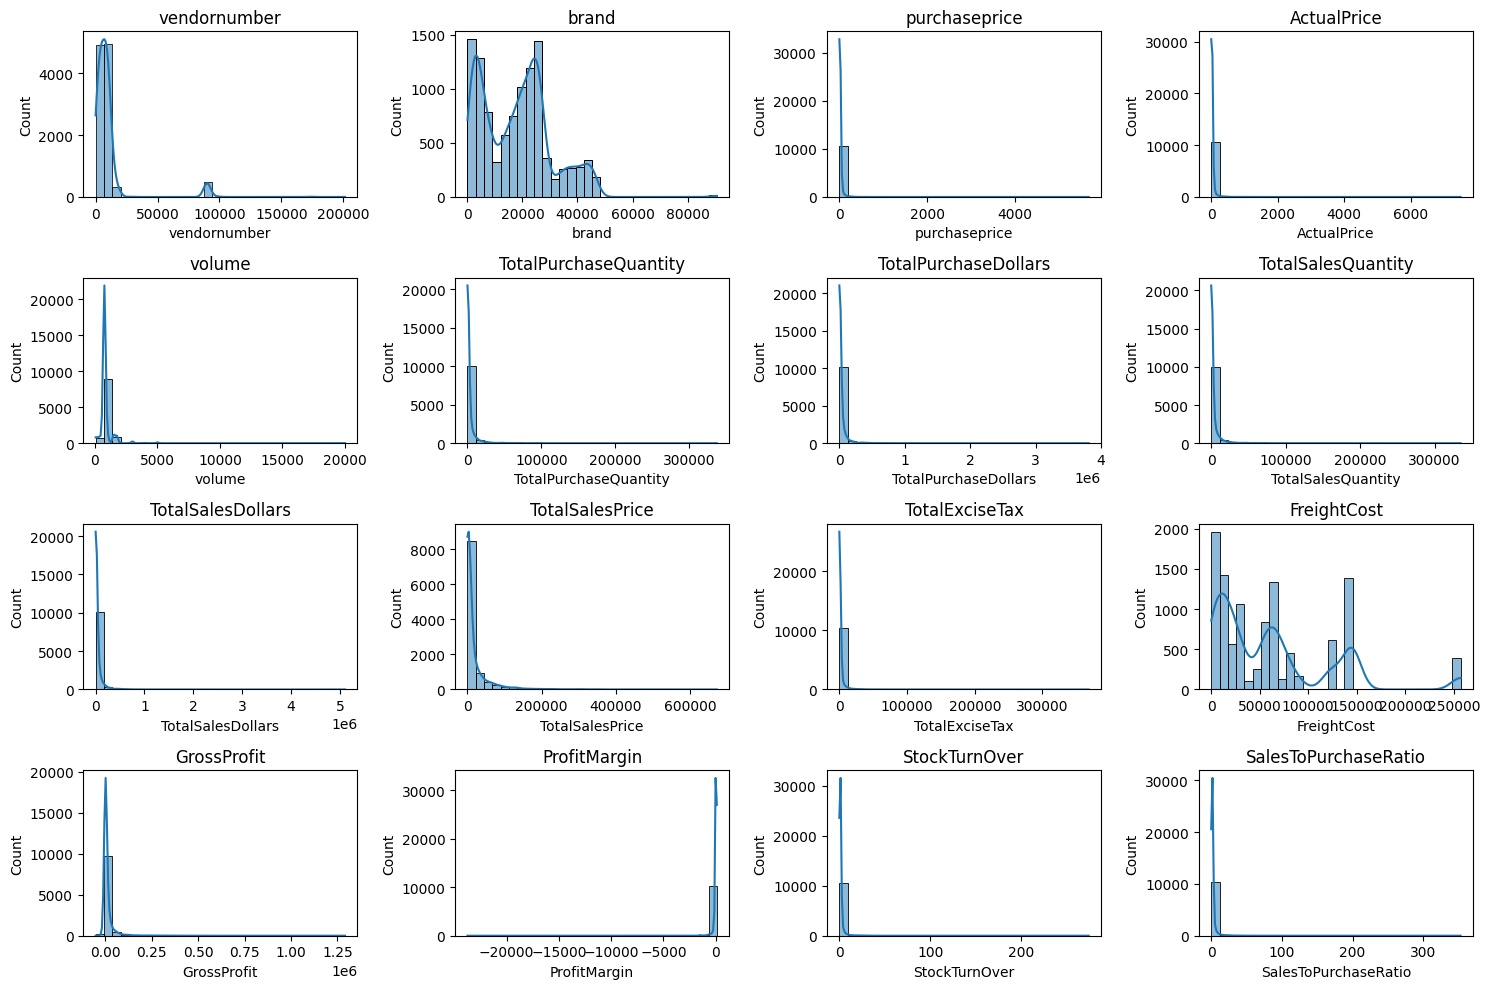

In [6]:
# We will make subplots of the numerical columns in the data

numerical_columns = df.select_dtypes(include = np.number).columns

# now we will find the total number of numeric columns
num_col = len(numerical_columns)

# Now we will make rows and columns grid to define how many we will put in a particular row.
n_col = 4
n_rows = math.ceil(num_col/n_col)

# Now we will plot the graphs for all numerical columns
plt.figure(figsize=(15,10))

for i, col in enumerate(numerical_columns):
    plt.subplot(n_rows,n_col,i+1)
    sns.histplot(df[col], kde = True, bins = 30)
    plt.title(col)
    plt.tight_layout()
plt.show()

## Interpretation:
1. Here we find that major outliers are present across the sub-plots, probably because of the high-value purchases but in fewer items
2. To detect these outliers we will plot boxplots, for further analysis

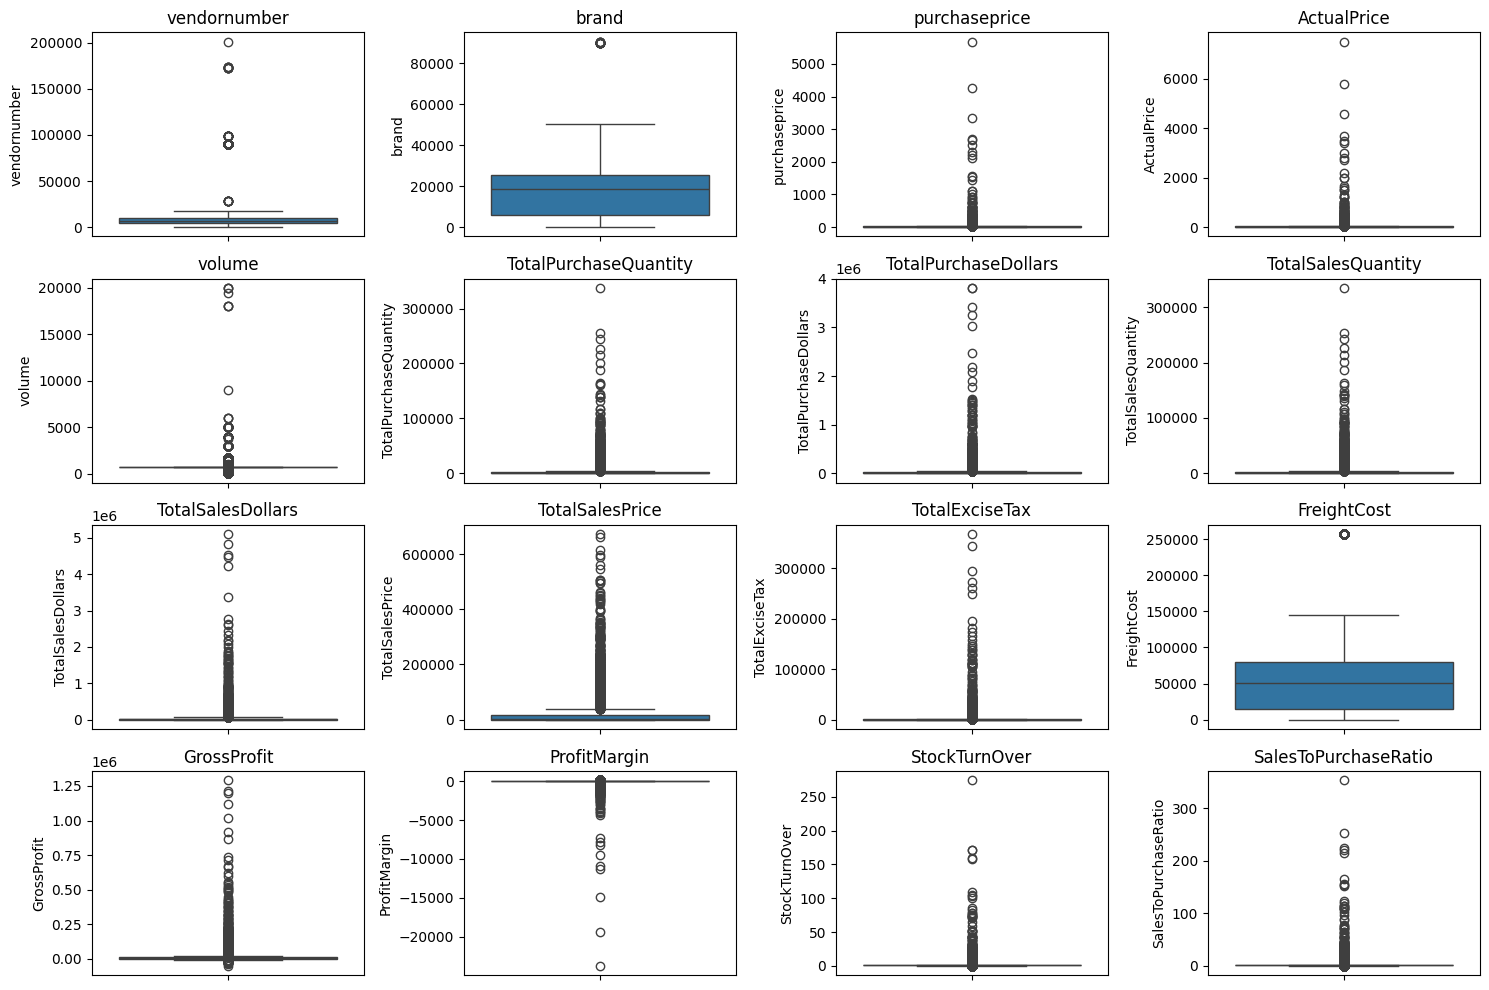

In [73]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_columns):
    plt.subplot(n_rows,n_col,i+1)
    sns.boxplot(y = df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

## Outlier Removals:
Since all outliers cannot be removed, as they contain premium brands as well, so:
1. We will remove only those outliers that have nothing to do with further analysis
2. ProfitMargin, GrossProfit > 0, SalesQuantity > 0 

In [49]:
df = pd.read_sql_query('''
select * from vendor_sales_summary where
GrossProfit > 0
and
ProfitMargin > 0
and
TotalSalesQuantity > 0
''',conn)
df

,vendornumber,vendorname,brand,description,purchaseprice,ActualPrice,volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


## So the data is again cleaned, and we will again plot the graphs, post removing outliers

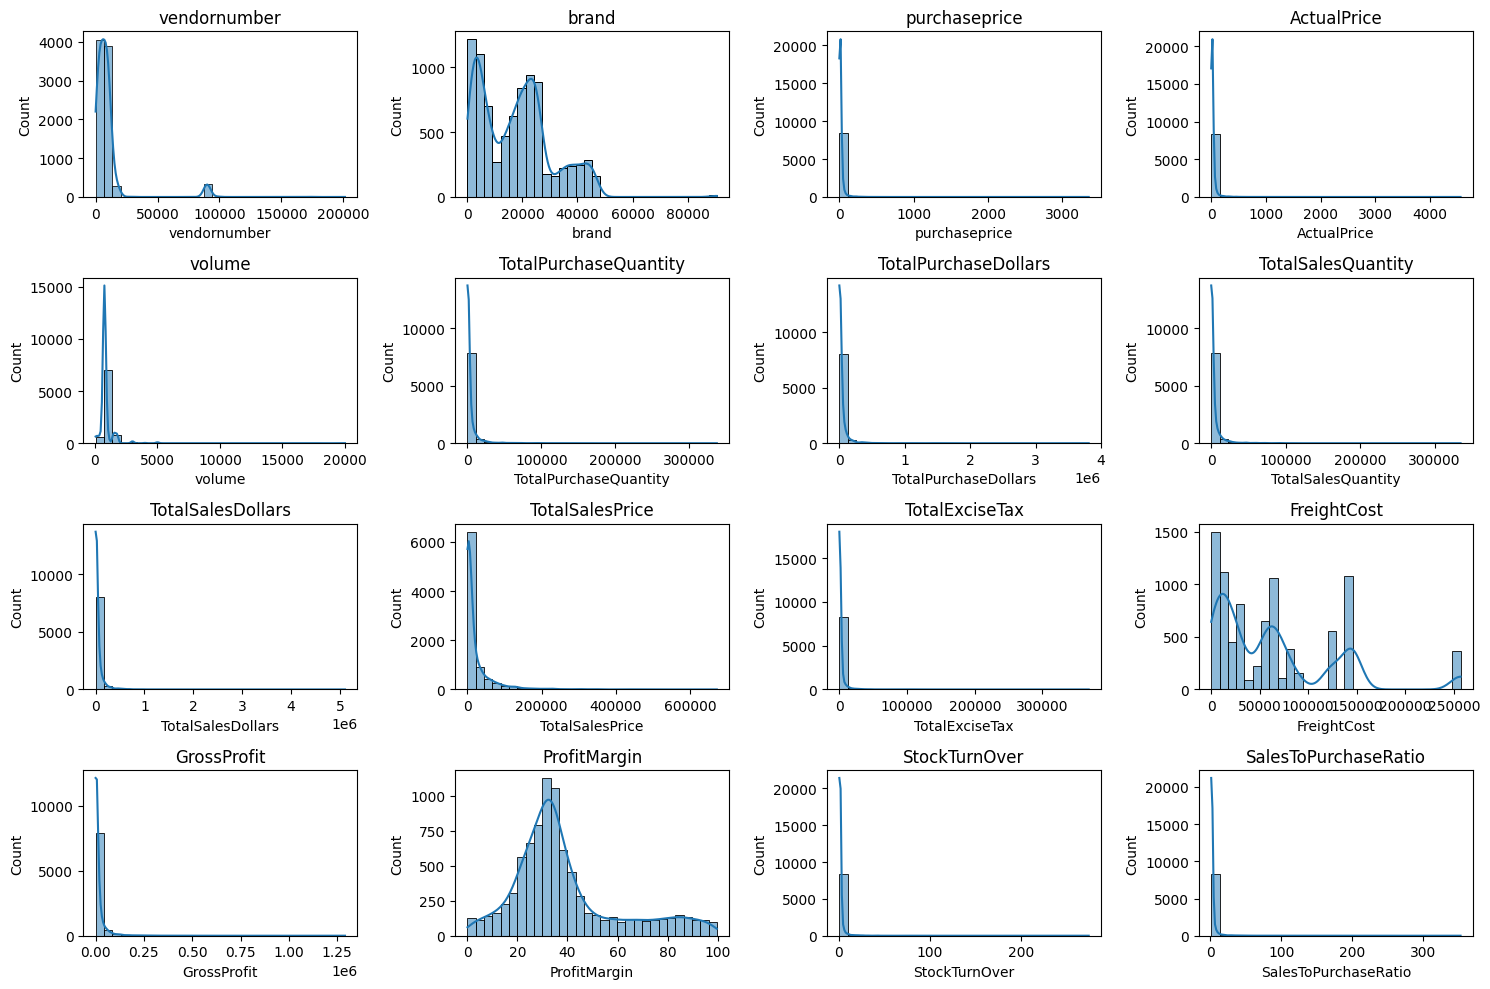

In [78]:
# We will make subplots of the numerical columns in the data

numerical_columns = df.select_dtypes(include = np.number).columns

# now we will find the total number of numeric columns
num_col = len(numerical_columns)

# Now we will make rows and columns grid to define how many we will put in a particular row.
n_col = 4
n_rows = math.ceil(num_col/n_col)

# Now we will plot the graphs for all numerical columns
plt.figure(figsize=(15,10))

for i, col in enumerate(numerical_columns):
    plt.subplot(n_rows,n_col,i+1)
    sns.histplot(df[col], kde = True, bins = 10)
    plt.title(col)
    plt.tight_layout()
plt.show()

## After analyzing the data, now:
1. We will find which product and which vendor has high frequency in our whole data
2. For this we can look for countplot

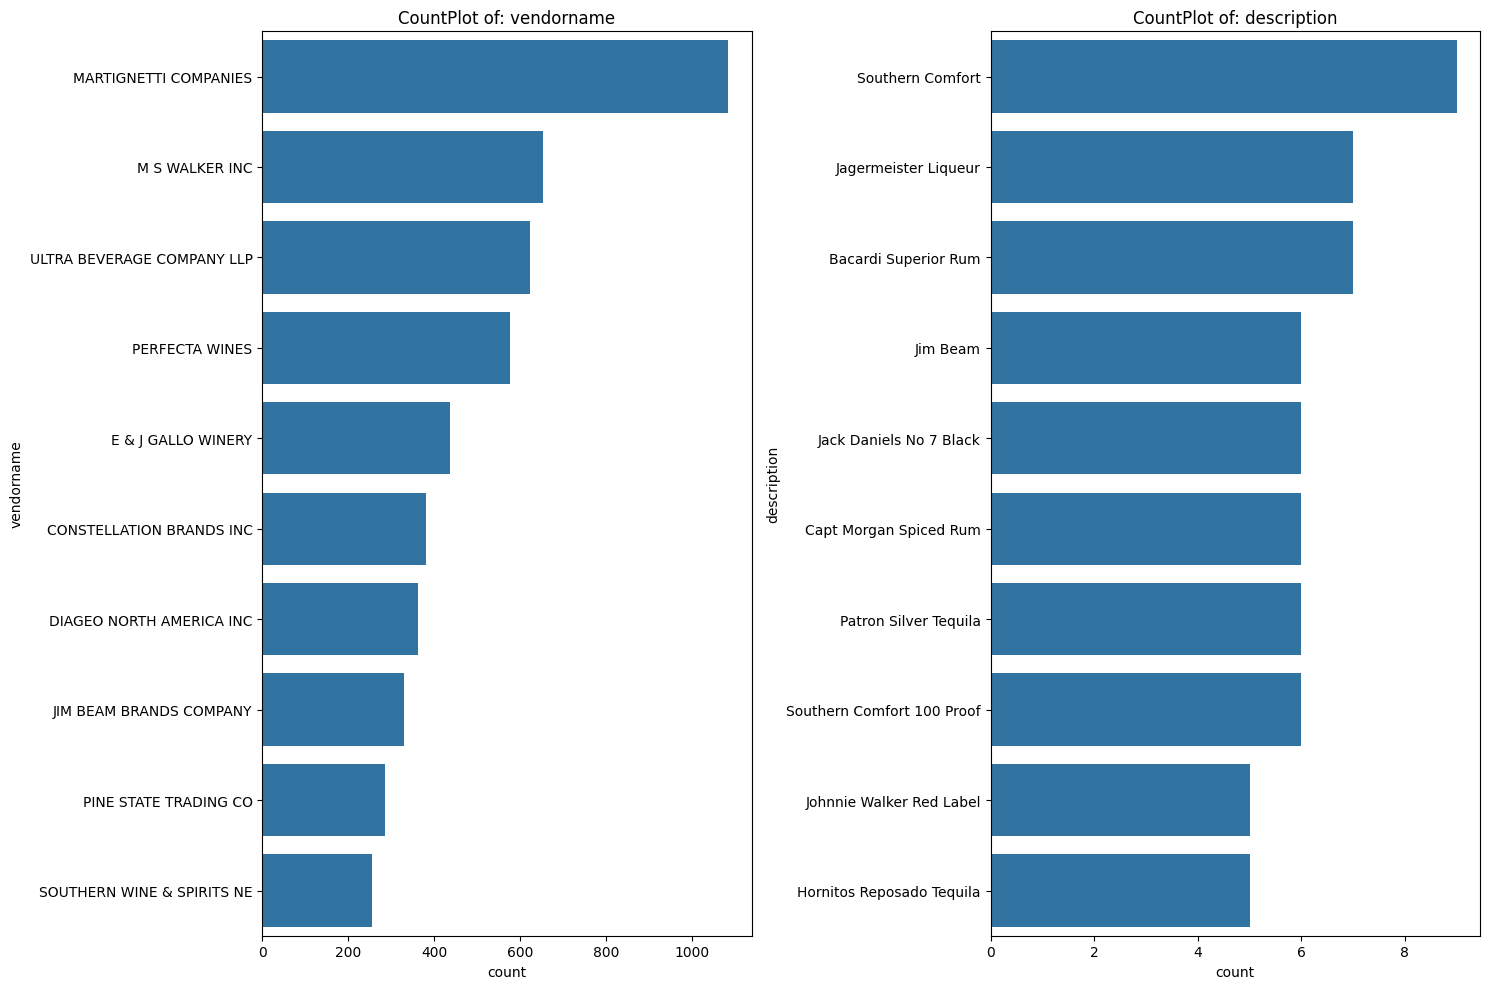

In [86]:
cate_col = ["vendorname", "description"]

plt.figure(figsize=(15,10))

for i, col in enumerate(cate_col):
    plt.subplot(1,2,i+1)
    sns.countplot(y = df[col], order = df[col].value_counts().index[:10])
    plt.title(f"CountPlot of: {col}")
    
plt.tight_layout()    
plt.show()

In [79]:
df.columns

Index(['vendornumber', 'vendorname', 'brand', 'description', 'purchaseprice',
       'ActualPrice', 'volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTurnOver', 'SalesToPurchaseRatio'],
      dtype='object')

# Now:
1. We will check about the relationship about the numerical values in the dataset
2. So, for this we will proceed with Corelation heatmap, for describing the relation between 2 variables

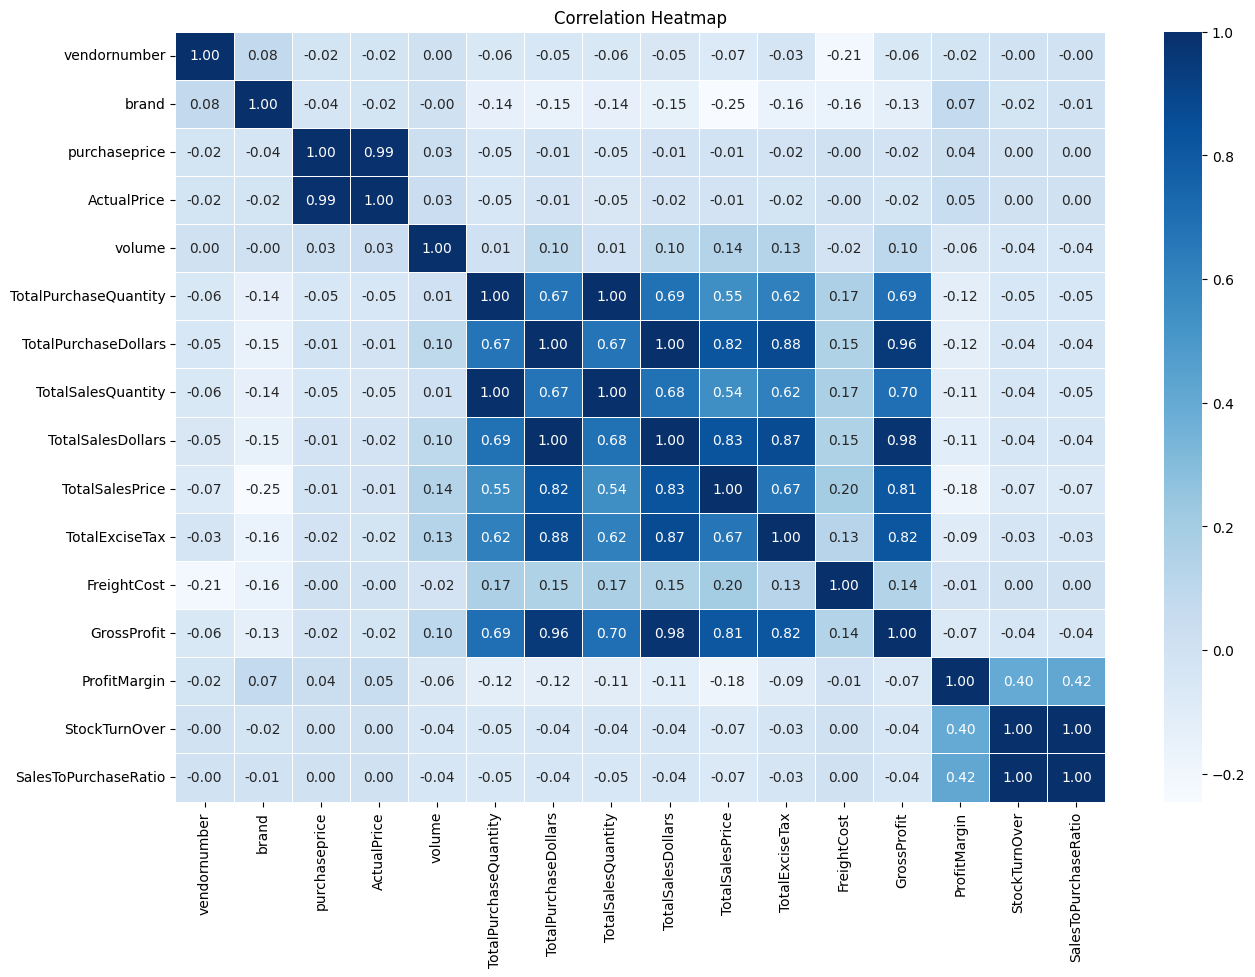

In [100]:
plt.figure(figsize=(15,10))
cor_mat = df[numerical_columns].corr()
sns.heatmap(cor_mat, annot= True, fmt = ".2f", cmap = "Blues", linewidth = 0.5)
plt.title("Correlation Heatmap")
plt.show()

### Observation across the correlation heatmap:
1. Strong positive correlation between PurchaseQuantity and SalesQuantity (1.00), suggesting very efficient stock management 
2. Negative correlation between SalesDollar and Profit Margin (-0.12), with salesprice increasing and profit margin decreasing

# Data Analysis basis Research Questions:

In [145]:
# Identify brands that need Promotional or Pricing Adjustments that exhibit lower sales performance but higher profit margins
brand_performance = df.groupby("description").agg({"TotalSalesDollars": "sum", "ProfitMargin": "mean"}).reset_index()
brand_per

,description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [130]:
# We made a threshold for lower sales (low 10% data), and high profit margin (85% more than profits)

low_sales_thresh = brand_performance["TotalSalesDollars"].quantile(0.15)
high_profit_thresh = brand_performance["ProfitMargin"].quantile(0.85)

print(f"{round(low_sales_thresh,2)}$")
print(f"{round(high_profit_thresh,2)}%")

560.3$
64.97%


In [136]:
target_brands = brand_performance[(brand_performance["TotalSalesDollars"] <= low_sales_thresh) & (brand_performance["ProfitMargin"] >= high_profit_thresh)]
display(target_brands.sort_values("TotalSalesDollars"))

,TotalSalesDollars,ProfitMargin
description,,
Santa Rita Organic Svgn Bl,9.99,66.466466
Debauchery Pnt Nr,11.58,65.975820
Concannon Glen Ellen Wh Zin,15.95,83.448276
Crown Royal Apple,27.86,89.806174
Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...
Nanbu Bijin Southern Beauty,535.68,76.747312
Dad's Hat Rye Whiskey,538.89,81.851584
A Bichot Clos Marechaudes,539.94,67.740860


In [148]:
brand_performance= brand_performance[brand_performance["TotalSalesDollars"] < 10000]

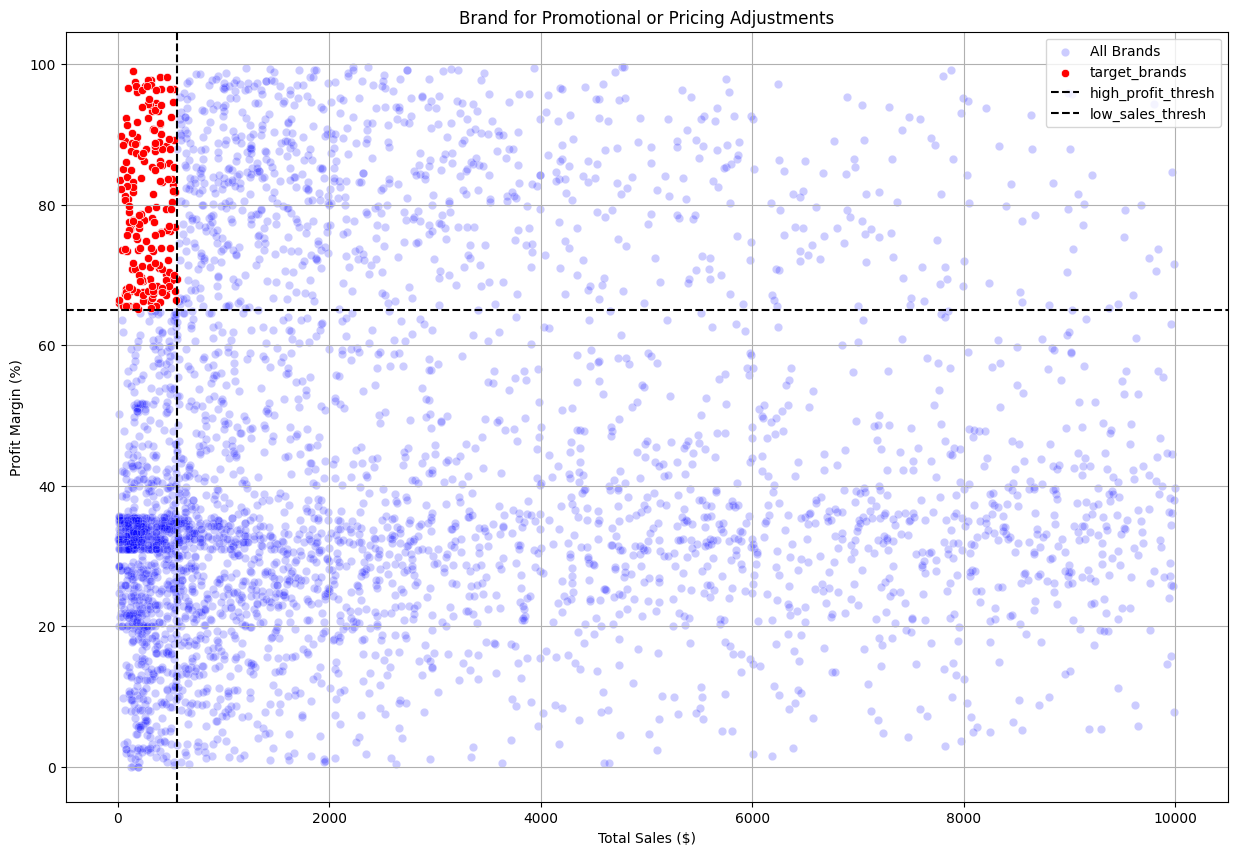

In [149]:
plt.figure(figsize=(15,10))

sns.scatterplot(data=brand_performance,x="TotalSalesDollars", y="ProfitMargin", color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands,x="TotalSalesDollars", y="ProfitMargin", color="red", label="target_brands")

plt.axhline(high_profit_thresh, linestyle= "--", color = "black", label = "high_profit_thresh")
plt.axvline(low_sales_thresh, linestyle= "--", color = "black", label = "low_sales_thresh")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brand for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()


In [33]:
# A function for changing values to M and K

def dollars_formatting (value):
    if value >= 1000000:
        return(f"{value/1000000:.2f}M")
    elif value >= 1000:
        return(f"{value/1000:.2f}K")
    else:
        return str(value)

In [183]:
# Vendors by sales performance and description demonstrating high sales performance?

top_vendors = df.groupby("vendorname")["TotalSalesDollars"].sum().reset_index().sort_values(by = "TotalSalesDollars", ascending = False).head(10)
top_brands= df.groupby("description")["TotalSalesDollars"].sum().reset_index().sort_values(by = "TotalSalesDollars", ascending = False).head(10)

top_vendors["TotalSalesDollars"] = top_vendors["TotalSalesDollars"].apply(dollars_formatting)
top_vendors

,vendorname,TotalSalesDollars
25,DIAGEO NORTH AMERICA INC,67.99M
57,MARTIGNETTI COMPANIES,39.33M
68,PERNOD RICARD USA,32.06M
46,JIM BEAM BRANDS COMPANY,31.42M
6,BACARDI USA INC,24.85M
20,CONSTELLATION BRANDS INC,24.22M
30,E & J GALLO WINERY,18.40M
11,BROWN-FORMAN CORP,18.25M
106,ULTRA BEVERAGE COMPANY LLP,16.50M
53,M S WALKER INC,14.71M


In [184]:
top_brands["TotalSalesDollars"] = top_brands["TotalSalesDollars"].apply(dollars_formatting)
top_brands

,description,TotalSalesDollars
3771,Jack Daniels No 7 Black,7.96M
7114,Tito's Handmade Vodka,7.40M
3402,Grey Goose Vodka,7.21M
1272,Capt Morgan Spiced Rum,6.36M
86,Absolut 80 Proof,6.24M
3850,Jameson Irish Whiskey,5.72M
4101,Ketel One Vodka,5.07M
478,Baileys Irish Cream,4.15M
4019,Kahlua,3.60M
6846,Tanqueray,3.46M


In [207]:
# Vendors contributing most to the TotalPurchaseDollars?

vendors_performance = df.groupby("vendorname").agg({
    "TotalPurchaseDollars": "sum",
     "TotalSalesDollars": "sum",
     "GrossProfit": "sum"
    })
vendors_performance_sorted = vendors_performance.sort_values(by="TotalPurchaseDollars",ascending = False)
vendors_performance_sorted["TotalPurchaseDollars"]= vendors_performance_sorted["TotalPurchaseDollars"].apply(dollars_formatting)
vendors_performance_sorted["TotalSalesDollars"] = vendors_performance_sorted["TotalSalesDollars"].apply(dollars_formatting)
vendors_performance_sorted["GrossProfit"]= vendors_performance_sorted["GrossProfit"].apply(dollars_formatting)

vendors_performance_sorted.head(20)

,TotalPurchaseDollars,TotalSalesDollars,GrossProfit
vendorname,,,
DIAGEO NORTH AMERICA INC,50.10M,67.99M,17.89M
MARTIGNETTI COMPANIES,25.50M,39.33M,13.83M
PERNOD RICARD USA,23.85M,32.06M,8.21M
JIM BEAM BRANDS COMPANY,23.49M,31.42M,7.93M
BACARDI USA INC,17.43M,24.85M,7.42M
CONSTELLATION BRANDS INC,15.27M,24.22M,8.95M
BROWN-FORMAN CORP,13.24M,18.25M,5.01M
E & J GALLO WINERY,12.07M,18.40M,6.33M
ULTRA BEVERAGE COMPANY LLP,11.17M,16.50M,5.34M


In [14]:
# Bulk purchasing's effectiveness in optimising the unit price, with the optimal purchase volume for saving cost

df["UnitPurchasePrice"] = df["TotalPurchaseDollars"] / df["TotalPurchaseQuantity"]
df[["UnitPurchasePrice", "TotalPurchaseDollars", "TotalPurchaseQuantity"]]

# After analzing the per/unit price, we will now segregate the unit price basis the totalpurchase quantity on small, medium, and large bucket size
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels = ["Small","Medium", "Large"])
df[["OrderSize","UnitPurchasePrice", "TotalPurchaseDollars", "TotalPurchaseQuantity"]]

# After categorising the quantity, we will now see which category has lowest mean
df.groupby("OrderSize")["UnitPurchasePrice"].mean()


OrderSize
Small     39.068186
Medium    15.486414
Large     10.777625
Name: UnitPurchasePrice, dtype: float64

### Analysis:
1. It is clearly visible that the organisation will benefit from the bulk purchases from the vendors
2. Purchases in small quantities is not economical for generating revenue
3. Large orders clearly help us save 72% of our unit price than small orders

### Recommendation:
1. Make bulk purchases from vendors, which will encourage them to give us in less price 

In [24]:
# But for higher purchases in bulk, we will need to eliminate which vendors that have low stock turnover, to analyse:
# 1. The vendors have low inventory
# 2. Indicating: Excess stock and slow-moving products

df[df["StockTurnOver"]<1].groupby("vendornumber")[["StockTurnOver"]].mean().sort_values("StockTurnOver", ascending = True).head(20)

# Analysis:
# This tells us that which vendor aregiving us incurring huge losses, since their stockturnover is low

,StockTurnOver
vendornumber,
1703,0.615385
3951,0.708333
6830,0.751306
1650,0.755676
17037,0.766022
2876,0.773953
28750,0.783835
173357,0.797078
90017,0.807569


In [45]:
# Finding who the vendors that are contributing to the low StockTurnOver 
# 1. For this we will calculate our unsold inventory value
# 2. Vendors that have contributed to organisation's high inventory value

df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["purchaseprice"]
print(dollars_formatting(df["UnsoldInventoryValue"].sum()))

# Aggregating all the capital locked as per the vendors
inventory_value_per_vendor = df.groupby("vendornumber")["UnsoldInventoryValue"].sum().reset_index()

inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by = "UnsoldInventoryValue", ascending = False)
inventory_value_per_vendor["UnsoldInventoryValue"]=inventory_value_per_vendor["UnsoldInventoryValue"].apply(dollars_formatting)
inventory_value_per_vendor.head(10)

2.71M


,vendornumber,UnsoldInventoryValue
37,3960,722.21K
89,12546,554.67K
93,17035,470.63K
33,3664,401.96K
32,3252,228.28K
63,8004,198.44K
10,1128,177.73K
14,1392,133.62K
64,8112,126.48K
58,7239,118.60K


In [50]:
    import os
    print(os.getcwd())

E:\Vendor Performance Analysis


In [52]:
df.to_csv("vendor_sales_summary.csv", index=False)